<a href="https://colab.research.google.com/github/Weedmastercrucifer/CNN-with-Qlearning/blob/main/Copy_of_IICCNNModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install stellargraph

In [ ]:
import stellargraph as sg

In [ ]:
import tensorflow as tf 
import numpy as np
print(tf.__version__)

2.8.0


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
model=tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(input_shape=(48,48,3),filters=32,kernel_size=(4,4),activation="relu"))
#model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=(4,4),padding="same", activation="relu"))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(2,2),  activation="relu"))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(tf.keras.layers.Conv2D(filters=8, kernel_size=(2,2),  activation="relu"))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=128,activation="relu")) 
model.add(tf.keras.layers.Dense(units=6, activation="softmax"))
model.summary()

opt=tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt,loss=tf.keras.losses.categorical_crossentropy,metrics=['accuracy'])




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 45, 45, 32)        1568      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 22, 22, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 21, 21, 16)        2064      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 16)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 8)           520       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 8)          0

In [ ]:
# batch=20
# traindata,testdata=tf.keras.preprocessing.image_dataset_from_directory(directory="/content/drive/MyDrive/IIC Project Material/Indoor Object Detection Dataset/allimages",image_size=(48,48),batch_size=batch,shuffle=True,validation_split=0.3)
# image_data_train = totdata.flow_from_directory(str(data_root),subset='training')
# image_data_val = totdata.flow_from_directory(str(data_root),subset='validation')

image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255, validation_split=0.3)    

train_dataset = image_generator.flow_from_directory(batch_size=32,
                                                 directory='/content/drive/MyDrive/IIC Project Material/Indoor Object Detection Dataset/datasetimages',
                                                 shuffle=True,
                                                 target_size=(48, 48), 
                                                 subset="training",
                                                 class_mode='categorical')

validation_dataset = image_generator.flow_from_directory(batch_size=32,
                                                 directory='/content/drive/MyDrive/IIC Project Material/Indoor Object Detection Dataset/datasetimages',
                                                 shuffle=True,
                                                 target_size=(48, 48), 
                                                 subset="validation",
                                                 class_mode='categorical')

Found 1551 images belonging to 6 classes.
Found 662 images belonging to 6 classes.


In [ ]:
import gc
gc.collect()

584

In [ ]:
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath="/content/drive/MyDrive/Colab Notebooks/data/iic_cnn.h5",
    save_weights_only=False,
    verbose=1,
    save_best_only=True,
    monitor='val_loss')

In [ ]:
rlrop = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.25, patience=1)

In [ ]:
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=3,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=True
)

In [ ]:
# checkpoint = tf.keras.callbacks.ModelCheckpoint("finalmodel.h5",monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', save_freq='epoch')

history = model.fit(
    train_dataset,steps_per_epoch=20,validation_data=validation_dataset,validation_steps=20,epochs=100,callbacks=[cp_callback, early_stop, rlrop]
    )

Epoch 1/100
20/20 [==============================] - ETA: 0s - loss: 1.5521 - accuracy: 0.4609
Epoch 1: val_loss improved from inf to 1.47869, saving model to /content/drive/MyDrive/Colab Notebooks/data/iic_cnn.h5
20/20 [==============================] - 428s 21s/step - loss: 1.5521 - accuracy: 0.4609 - val_loss: 1.4787 - val_accuracy: 0.5250 - lr: 0.0010
Epoch 2/100
20/20 [==============================] - ETA: 0s - loss: 1.4313 - accuracy: 0.5250
Epoch 2: val_loss improved from 1.47869 to 1.43820, saving model to /content/drive/MyDrive/Colab Notebooks/data/iic_cnn.h5
20/20 [==============================] - 134s 7s/step - loss: 1.4313 - accuracy: 0.5250 - val_loss: 1.4382 - val_accuracy: 0.5219 - lr: 0.0010
Epoch 3/100
20/20 [==============================] - ETA: 0s - loss: 1.4019 - accuracy: 0.5250
Epoch 3: val_loss improved from 1.43820 to 1.40743, saving model to /content/drive/MyDrive/Colab Notebooks/data/iic_cnn.h5
20/20 [==============================] - 76s 4s/step - loss: 1.

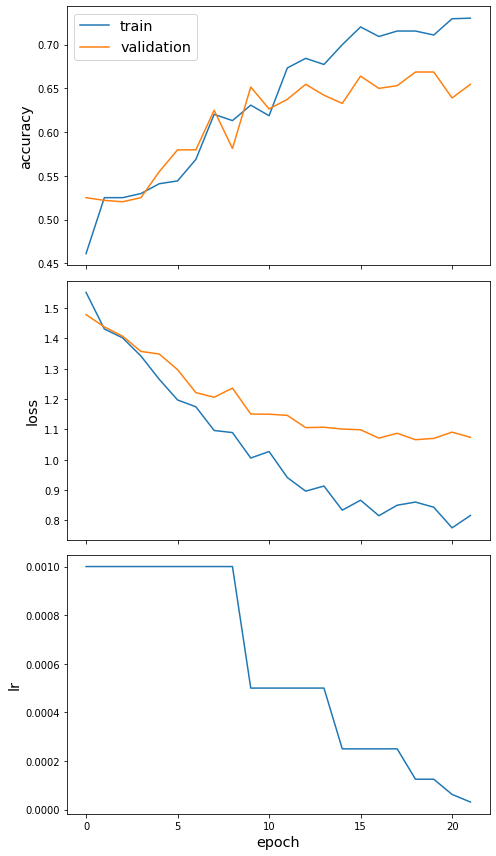

In [ ]:
import stellargraph as sg
sg.utils.plot_history(history)

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/data/')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/data/assets


In [ ]:
ls '/content/drive/MyDrive/Colab Notebooks/data/'

assets/                                  graph_list.pickle  label_list.pkl
EEG_ConvertedData.tar.gz                 graph_list.pkl     labels_list.pickle
EMG_ConvertedData.tar.gz                 iic_cnn_2/         saved_model/
EMG_session1_sub1_reaching_MI.mat        iic_cnn_3.h5       saved_model.pb
EMG_session1_sub1_reaching_realMove.mat  iic_cnn.h5         variables/
EOG_ConvertedData.tar.gz                 keras_metadata.pb  weights/


In [ ]:
# checkpoint = tf.keras.callbacks.ModelCheckpoint("finalmodel.h5",monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', save_freq='epoch')

model2 = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/data/iic_cnn.h5')

opt2=tf.keras.optimizers.Adam(learning_rate=0.001)
model2.compile(optimizer=opt2,loss=tf.keras.losses.categorical_crossentropy,metrics=['accuracy'])

In [ ]:
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 45, 45, 32)        1568      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 22, 22, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 21, 21, 16)        2064      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 16)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 8)           520       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 8)          0

In [ ]:
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath="/content/drive/MyDrive/Colab Notebooks/data/iic_cnn2.h5",
    save_weights_only=False,
    verbose=1,
    save_best_only=True,
    monitor='val_loss')

In [ ]:
rlrop2 = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.25, patience=5)

In [ ]:
history2 = model2.fit(
    train_dataset,steps_per_epoch=20,validation_data=validation_dataset,validation_steps=20,epochs=100, callbacks = [rlrop2],
    )

Epoch 1/100
20/20 [==============================] - 22s 1s/step - loss: 0.6965 - accuracy: 0.7547 - val_loss: 1.1980 - val_accuracy: 0.6062 - lr: 0.0010
Epoch 2/100
20/20 [==============================] - 24s 1s/step - loss: 0.7882 - accuracy: 0.7250 - val_loss: 1.1735 - val_accuracy: 0.6062 - lr: 0.0010
Epoch 3/100
20/20 [==============================] - 25s 1s/step - loss: 0.6493 - accuracy: 0.7849 - val_loss: 1.0710 - val_accuracy: 0.6656 - lr: 0.0010
Epoch 4/100
20/20 [==============================] - 24s 1s/step - loss: 0.6592 - accuracy: 0.7437 - val_loss: 1.0865 - val_accuracy: 0.6562 - lr: 0.0010
Epoch 5/100
20/20 [==============================] - 23s 1s/step - loss: 0.6318 - accuracy: 0.7705 - val_loss: 1.0458 - val_accuracy: 0.6797 - lr: 0.0010
Epoch 6/100
20/20 [==============================] - 23s 1s/step - loss: 0.6470 - accuracy: 0.7657 - val_loss: 1.0594 - val_accuracy: 0.6594 - lr: 0.0010
Epoch 7/100
20/20 [==============================] - 24s 1s/step - loss: 0.6

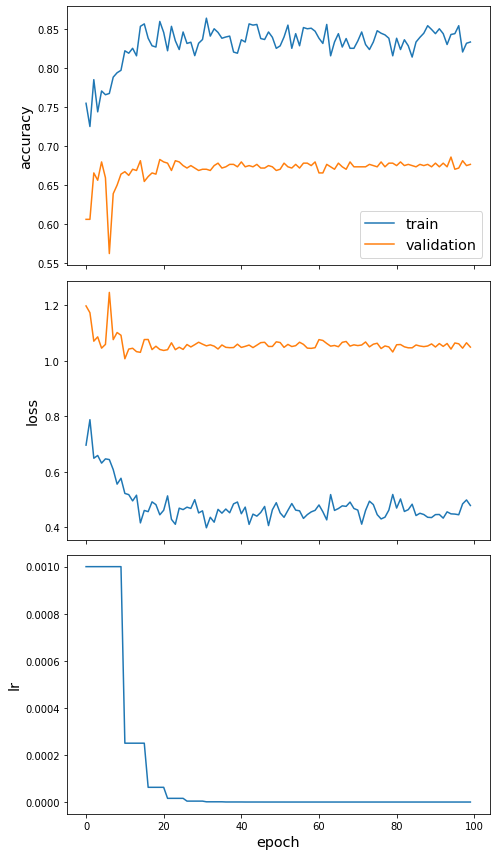

In [ ]:
sg.utils.plot_history(history2)

In [ ]:
model2.save('/content/drive/MyDrive/Colab Notebooks/data/iic_cnn_2.h5')

In [ ]:
# batch=20
# traindata,testdata=tf.keras.preprocessing.image_dataset_from_directory(directory="/content/drive/MyDrive/IIC Project Material/Indoor Object Detection Dataset/allimages",image_size=(48,48),batch_size=batch,shuffle=True,validation_split=0.3)
# image_data_train = totdata.flow_from_directory(str(data_root),subset='training')
# image_data_val = totdata.flow_from_directory(str(data_root),subset='validation')

image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255, validation_split=0.3)    

train_dataset2 = image_generator.flow_from_directory(batch_size=64,
                                                 directory='/content/drive/MyDrive/IIC Project Material/Indoor Object Detection Dataset/datasetimages',
                                                 shuffle=True,
                                                 target_size=(48, 48), 
                                                 subset="training",
                                                 class_mode='categorical')

validation_dataset2 = image_generator.flow_from_directory(batch_size=64,
                                                 directory='/content/drive/MyDrive/IIC Project Material/Indoor Object Detection Dataset/datasetimages',
                                                 shuffle=True,
                                                 target_size=(48, 48), 
                                                 subset="validation",
                                                 class_mode='categorical')

Found 1551 images belonging to 6 classes.
Found 662 images belonging to 6 classes.


In [ ]:
# checkpoint = tf.keras.callbacks.ModelCheckpoint("finalmodel.h5",monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', save_freq='epoch')

model3 = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/data/iic_cnn.h5')

opt3=tf.keras.optimizers.Adam(learning_rate=0.001)
model3.compile(optimizer=opt3,loss=tf.keras.losses.categorical_crossentropy,metrics=['accuracy'])

In [ ]:
rlrop3 = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5)

In [ ]:
len(validation_dataset[0])

2

In [ ]:
# tf.compat.v1.enable_eager_execution()

In [ ]:
history3 = model3.fit(
    train_dataset2,steps_per_epoch=10,validation_data=validation_dataset2,validation_steps=10, epochs=50, callbacks = [rlrop3],
    )

Epoch 1/50
10/10 [==============================] - 389s 40s/step - loss: 0.9834 - accuracy: 0.6406 - val_loss: 1.2718 - val_accuracy: 0.5859 - lr: 0.0010
Epoch 2/50
10/10 [==============================] - 114s 12s/step - loss: 0.8837 - accuracy: 0.6766 - val_loss: 1.0819 - val_accuracy: 0.6531 - lr: 0.0010
Epoch 3/50
10/10 [==============================] - 74s 7s/step - loss: 0.8943 - accuracy: 0.6781 - val_loss: 1.0717 - val_accuracy: 0.6391 - lr: 0.0010
Epoch 4/50
10/10 [==============================] - 60s 6s/step - loss: 0.8773 - accuracy: 0.6812 - val_loss: 1.1392 - val_accuracy: 0.6141 - lr: 0.0010
Epoch 5/50
10/10 [==============================] - 37s 4s/step - loss: 0.7485 - accuracy: 0.7328 - val_loss: 1.0625 - val_accuracy: 0.6469 - lr: 0.0010
Epoch 6/50
10/10 [==============================] - 31s 3s/step - loss: 0.8143 - accuracy: 0.7109 - val_loss: 1.1255 - val_accuracy: 0.6219 - lr: 0.0010
Epoch 7/50
10/10 [==============================] - 25s 3s/step - loss: 0.7226

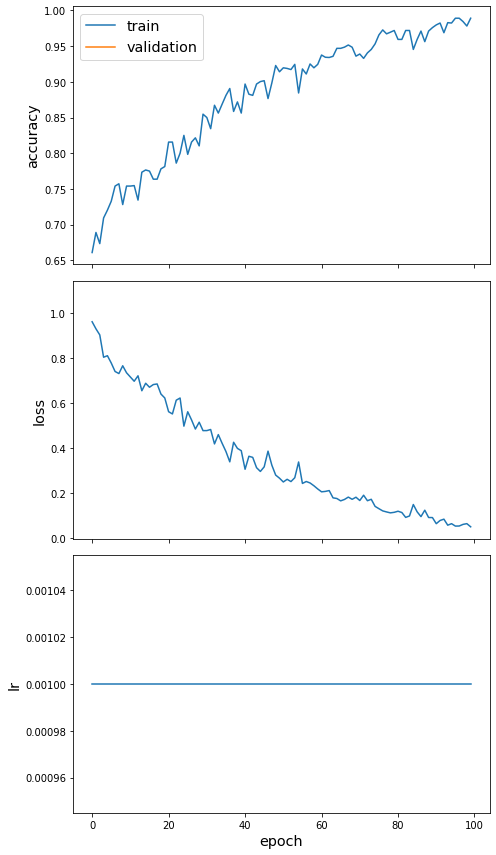

In [ ]:
sg.utils.plot_history(history3)

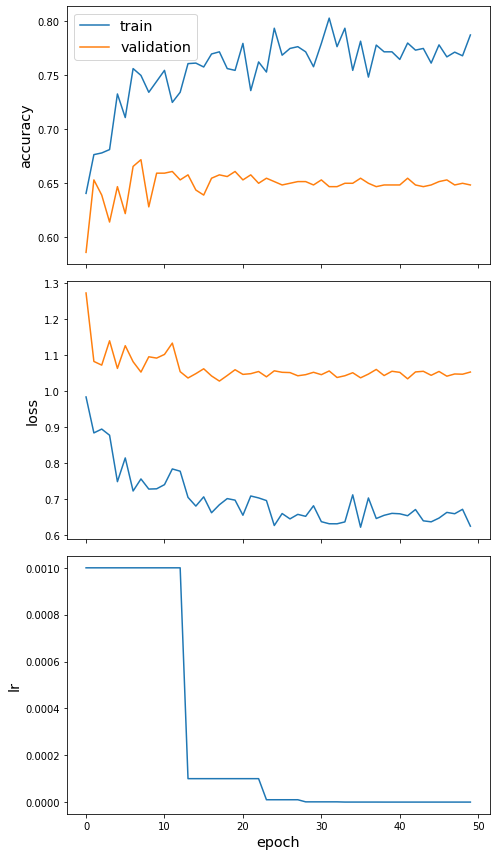

In [ ]:
sg.utils.plot_history(history3) #again

In [ ]:
model3.save('/content/drive/MyDrive/Colab Notebooks/data/iic_cnn_4.h5')

In [ ]:
validation_dataset2.class_indices.keys()

NameError: ignored

In [ ]:
import os

len(os.listdir('/content/drive/MyDrive/IIC Project Material/Indoor Object Detection Dataset/sequence_2'))

class_names = list(validation_dataset2.class_indices.keys())

In [ ]:
type(class_names)

list

[[0. 0. 0. 1. 0. 0.]]
sequence_4


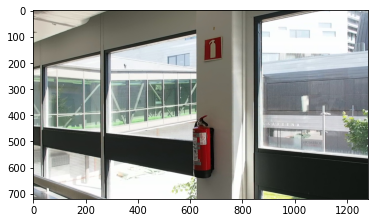

In [ ]:
test_path = "/content/drive/MyDrive/IIC Project Material/Indoor Object Detection Dataset/allimages/frame_s4_100.jpg"

img1 = tf.keras.preprocessing.image.load_img(
    test_path, target_size=(48,48)) 
img2 = tf.keras.preprocessing.image.load_img(
    test_path)
plt.imshow(img2)
img1 = np.asarray(img1)
# plt.imshow(img1)
img1 = np.expand_dims(img1, axis=0)
output1 = (model3.predict(img1))
print(output1)
# print(np.argmax(output1))
print(class_names[np.argmax(output1)])

[[4.4376990e-01 5.5799216e-30 5.5623013e-01 3.1872808e-18 0.0000000e+00
  0.0000000e+00]]
sequence_3


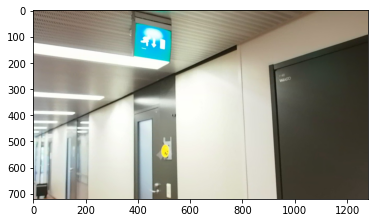

In [ ]:
test_path = "/content/drive/MyDrive/IIC Project Material/Indoor Object Detection Dataset/allimages/frame_s3_101.jpg"

img1 = tf.keras.preprocessing.image.load_img(
    test_path, target_size=(48,48)) 
img2 = tf.keras.preprocessing.image.load_img(
    test_path)
plt.imshow(img2)
img1 = np.asarray(img1)
# plt.imshow(img1)
img1 = np.expand_dims(img1, axis=0)
output1 = (model3.predict(img1))
print(output1)
# print(np.argmax(output1))
print(class_names[np.argmax(output1)])

[[1. 0. 0. 0. 0. 0.]]
sequence_1


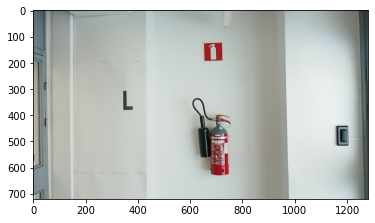

In [ ]:
test_path = "/content/drive/MyDrive/IIC Project Material/Indoor Object Detection Dataset/allimages/frame_s1_11.jpg"

img1 = tf.keras.preprocessing.image.load_img(
    test_path, target_size=(48,48)) 
img2 = tf.keras.preprocessing.image.load_img(
    test_path)
plt.imshow(img2)
img1 = np.asarray(img1)
# plt.imshow(img1)
img1 = np.expand_dims(img1, axis=0)
output1 = (model3.predict(img1))
print(output1)
# print(np.argmax(output1))
print(class_names[np.argmax(output1)])

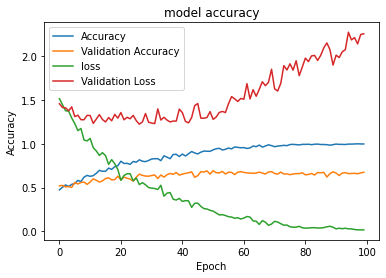

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist.history["accuracy"])
plt.plot(hist.history['val_accuracy'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()